In [ ]:
from scipy import stats
df = 59
alpha = 0.10
t_critical = stats.t.ppf(1 - alpha/2, df)
print(f"Critical t-value (90% CI, df=59): {t_critical:.3f}")

Critical t-value (90% CI, df=59): 1.671


In [ ]:
import numpy as np
x_bar = 49.999
s = 0.134
n = 60
t_value = 2.001  # t_{0.025,59}
margin_error = t_value * s / np.sqrt(n)
ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

95% CI: (49.964, 50.034)


In [ ]:
conf_levels = {0.10: 1.671, 0.05: 2.001, 0.01: 2.662}
for alpha, t_val in conf_levels.items():
    me = t_val * s / np.sqrt(n)
    print(f"{100*(1-alpha)}% CI: ({x_bar - me:.3f}, {x_bar + me:.3f})")

90.0% CI: (49.970, 50.028)
95.0% CI: (49.964, 50.034)
99.0% CI: (49.953, 50.045)


In [ ]:
def ci_length(t_value, std, n):
    return 2 * t_value * std / np.sqrt(n)

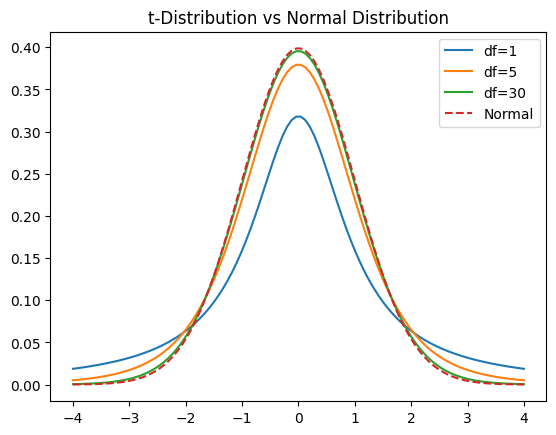

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.t.pdf(x, df=1), label='df=1')
plt.plot(x, stats.t.pdf(x, df=5), label='df=5')
plt.plot(x, stats.t.pdf(x, df=30), label='df=30')
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--')
plt.legend()
plt.title("t-Distribution vs Normal Distribution")
plt.show()

In [ ]:
t_approx = 2.1
sigma_max = 4.0
L0 = 2.0
n_min = 4 * (t_approx * sigma_max / L0)**2
print(f"Minimum sample size: {np.ceil(n_min)}")

Minimum sample size: 71.0


In [ ]:
current_n = 60
t_value = 2.662
s = 0.134
L0 = 0.08
n_required = 4 * (t_value * s / L0)**2
additional_samples = np.ceil(n_required) - current_n
print(f"Additional samples needed: {max(0, additional_samples)}")


Additional samples needed: 20.0


In [ ]:
x_bar = 5.145
s = 0.7524
n = 28
t_upper = stats.t.ppf(0.99, df=n-1)  # t_{0.01,27}
upper_bound = x_bar + t_upper * s / np.sqrt(n)
print(f"99% Upper Bound: (-∞, {upper_bound:.3f})")

99% Upper Bound: (-∞, 5.497)


In [ ]:
sigma_known = 0.12
z_value = stats.norm.ppf(0.975)  # For 95% CI
z_lower = x_bar - z_value * sigma_known / np.sqrt(n)
z_upper = x_bar + z_value * sigma_known / np.sqrt(n)
print(f"z-Interval: ({z_lower:.3f}, {z_upper:.3f})")


z-Interval: (5.101, 5.189)


In [ ]:
def margin_of_error(t_value, std, n):
    return t_value * std / np.sqrt(n)

std_dev = 0.134
sample_sizes = [30, 60, 100]
for size in sample_sizes:
    me = margin_of_error(2.0, std_dev, size)  # Using t≈2.0
    print(f"n={size}: ME = {me:.4f}")

n=30: ME = 0.0489
n=60: ME = 0.0346
n=100: ME = 0.0268


In [ ]:
data = np.array([50.08, 49.78, 50.02, 50.02, 50.13, 49.74, 49.84, 49.97, 49.93, 50.02])
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)  # Sample std
t_value = stats.t.ppf(0.975, df=n-1)  # 95% CI
ci_lower = x_bar - t_value * s / np.sqrt(n)
ci_upper = x_bar + t_value * s / np.sqrt(n)
print(f"95% CI from data: ({ci_lower:.3f}, {ci_upper:.3f})")


95% CI from data: (49.861, 50.045)


In [ ]:
alphas = [0.10, 0.05, 0.01]
for alpha in alphas:
    t_val = stats.t.ppf(1 - alpha/2, df=59)
    width = 2 * t_val * s / np.sqrt(n)
    print(f"{100*(1-alpha)}% CI width: {width:.4f}")

90.0% CI width: 0.1364
95.0% CI width: 0.1633
99.0% CI width: 0.2172


In [ ]:
alpha = 0.05
t_lower = stats.t.ppf(1 - alpha, df=n-1)
lower_bound = x_bar - t_lower * s / np.sqrt(n)
print(f"95% Lower Bound: ({lower_bound:.3f}, ∞)")

95% Lower Bound: (49.878, ∞)


In [ ]:
from scipy.stats import t
ci = t.interval(confidence=0.90, df=len(data)-1,
               loc=np.mean(data), scale=stats.sem(data))
print(f"90% CI (auto): ({ci[0]:.3f}, {ci[1]:.3f})")

90% CI (auto): (49.878, 50.028)


In [ ]:
sigma_known = 0.13
z_value = stats.norm.ppf(0.995)  # 99% CI
me = z_value * sigma_known / np.sqrt(n)
print(f"99% z-Interval: ({x_bar - me:.3f}, {x_bar + me:.3f})")

99% z-Interval: (49.847, 50.059)


In [ ]:
desired_me = 0.05
t_approx = 2.0  # Initial approximation
sigma_est = 0.134
n_required = (t_approx * sigma_est / desired_me)**2
print(f"Required sample size: {np.ceil(n_required)}")

Required sample size: 29.0


In [ ]:
from sklearn.utils import resample
boot_means = [np.mean(resample(data)) for _ in range(1000)]
ci_bootstrap = np.percentile(boot_means, [2.5, 97.5])
print(f"Bootstrap 95% CI: ({ci_bootstrap[0]:.3f}, {ci_bootstrap[1]:.3f})")


Bootstrap 95% CI: (49.873, 50.026)


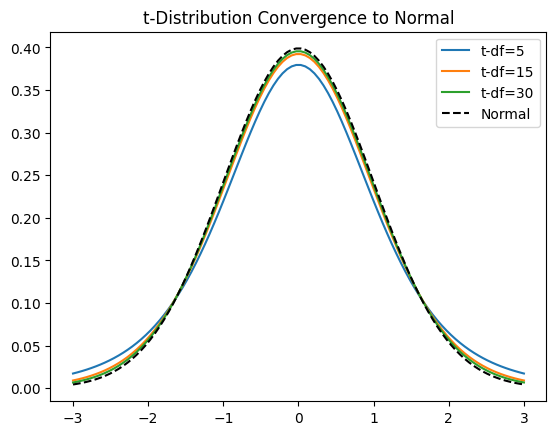

In [ ]:
df_values = [5, 15, 30]
x = np.linspace(-3, 3, 100)
for df in df_values:
    plt.plot(x, stats.t.pdf(x, df), label=f't-df={df}')
plt.plot(x, stats.norm.pdf(x), 'k--', label='Normal')
plt.legend()
plt.title("t-Distribution Convergence to Normal")
plt.show()

In [ ]:
t_table = {
    59: {0.10: 1.671, 0.05: 2.001, 0.025: 2.001, 0.01: 2.391, 0.005: 2.662}
}
df = 59
alpha = 0.05
critical_value = t_table[df][alpha]
print(f"Critical t-value (df=59, α={alpha}): {critical_value}")


Critical t-value (df=59, α=0.05): 2.001


In [ ]:
p_hat = 0.65
n = 100
z = stats.norm.ppf(0.975)
se = np.sqrt(p_hat*(1-p_hat)/n)
print(f"95% CI for proportion: ({p_hat - z*se:.3f}, {p_hat + z*se:.3f})")

95% CI for proportion: (0.557, 0.743)
